This code does:
    
1) Plots NGC1365
2) Locate the Supernovae within NGC1365

In [1]:
# import packages

from astropy.io import fits
import sys
# !{sys.executable} -m pip install aplpy
import numpy as np
import aplpy
import pandas as pd

In [2]:
fileName = "NGC1365_Hasub_flux.fits"

In [3]:
hdulist = fits.open(fileName)

FileNotFoundError: [Errno 2] No such file or directory: 'NGC1365_Hasub_flux.fits'

In [ ]:
fig = aplpy.FITSFigure(fileName)
fig.show_colorscale(cmap = 'magma')
fig.set_title('NGC1365')
fig.savefig('NGC1365.jpg')

In [5]:
# Master Table Columns
# Galaxy,SN Name,SN Type,ra,Dec,xCoord,yCoord,co21int,co21err,co21ew,beamsize

SNeName,SNtype,SNra,SNdec,Galaxy = np.loadtxt('SNeCOMasterCatClean.csv', dtype = str, delimiter = ',',unpack=True, usecols = (1,2,3,4,0))

SNe_data = pd.read_csv('SNeCOMasterCatClean.csv', header = 0, delimiter = ',')

In [6]:
SNe_data

,#Galaxy,SNeName,SNeType,ra,Dec,xCoord,yCoord,co21int,co21err,co21ew,beamsize
0,circinus,AT2020juh,Candidate,213.3379,-65.3413,51.937858,92.542430,4.545668,1.311794,NaN,0.002032
1,circinus,SN1996cr,II,213.2918,-65.3457,86.567614,84.634332,186.848040,2.137819,34.565370,0.002032
2,ngc0247,AT2019npi,Candidate,11.7453,-20.7083,175.722917,311.835970,0.000000,0.108299,NaN,0.002364
3,ngc0253,AT2019npd,Candidate,11.7363,-25.3768,527.820462,86.113427,1.729562,0.373518,1.804457,0.002325
4,ngc0253,AT2020hol,Candidate,11.8539,-25.3571,336.540997,121.660305,0.237821,0.634905,NaN,0.002325
5,ngc0253,AT2019pck,Candidate,11.8514,-25.2261,340.643959,357.559192,NaN,NaN,NaN,0.002325
6,ngc0253,SN1940E,I,11.8783,-25.2934,296.901053,236.266629,218.987960,1.444133,45.862267,0.002325
7,ngc0300,SN2019qyl,IIn/LBV,13.7399,-37.6444,124.979902,202.451664,-0.527365,0.450724,NaN,0.002271
8,ngc0628,SN2013ej,II,24.2007,15.7586,333.460226,356.779806,0.965554,1.407856,NaN,0.000311
9,ngc0628,SN2003gd,II,24.1777,15.7390,731.219467,3.150725,NaN,NaN,NaN,0.000311


In [7]:
SNe_data.loc[SNe_data['#Galaxy'] == 'ngc1365']

,#Galaxy,SNeName,SNeType,ra,Dec,xCoord,yCoord,co21int,co21err,co21ew,beamsize
14,ngc1365,SN2012fr,Ia,53.4006,-36.1268,390.290674,389.849940,-2.315072,1.117496,NaN,0.000383
15,ngc1365,SN2001du,II,53.3713,-36.1421,673.902485,205.704047,3.070322,1.335712,NaN,0.000383
16,ngc1365,SN1983V,Ic,53.3819,-36.1486,571.515391,127.963802,5.781725,1.145896,3.55028,0.000383


In [8]:
NGC1365_data = SNe_data.loc[SNe_data['#Galaxy'] == 'ngc1365']

In [19]:
ra_list = NGC1365_data.ra.tolist()
dec_list = NGC1365_data.Dec.tolist()
name_list = NGC1365_data.SNeName.tolist()
type_list = NGC1365_data.SNeType.tolist()

INFO: Auto-setting vmin to -1.553e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.780e+00 [aplpy.core]


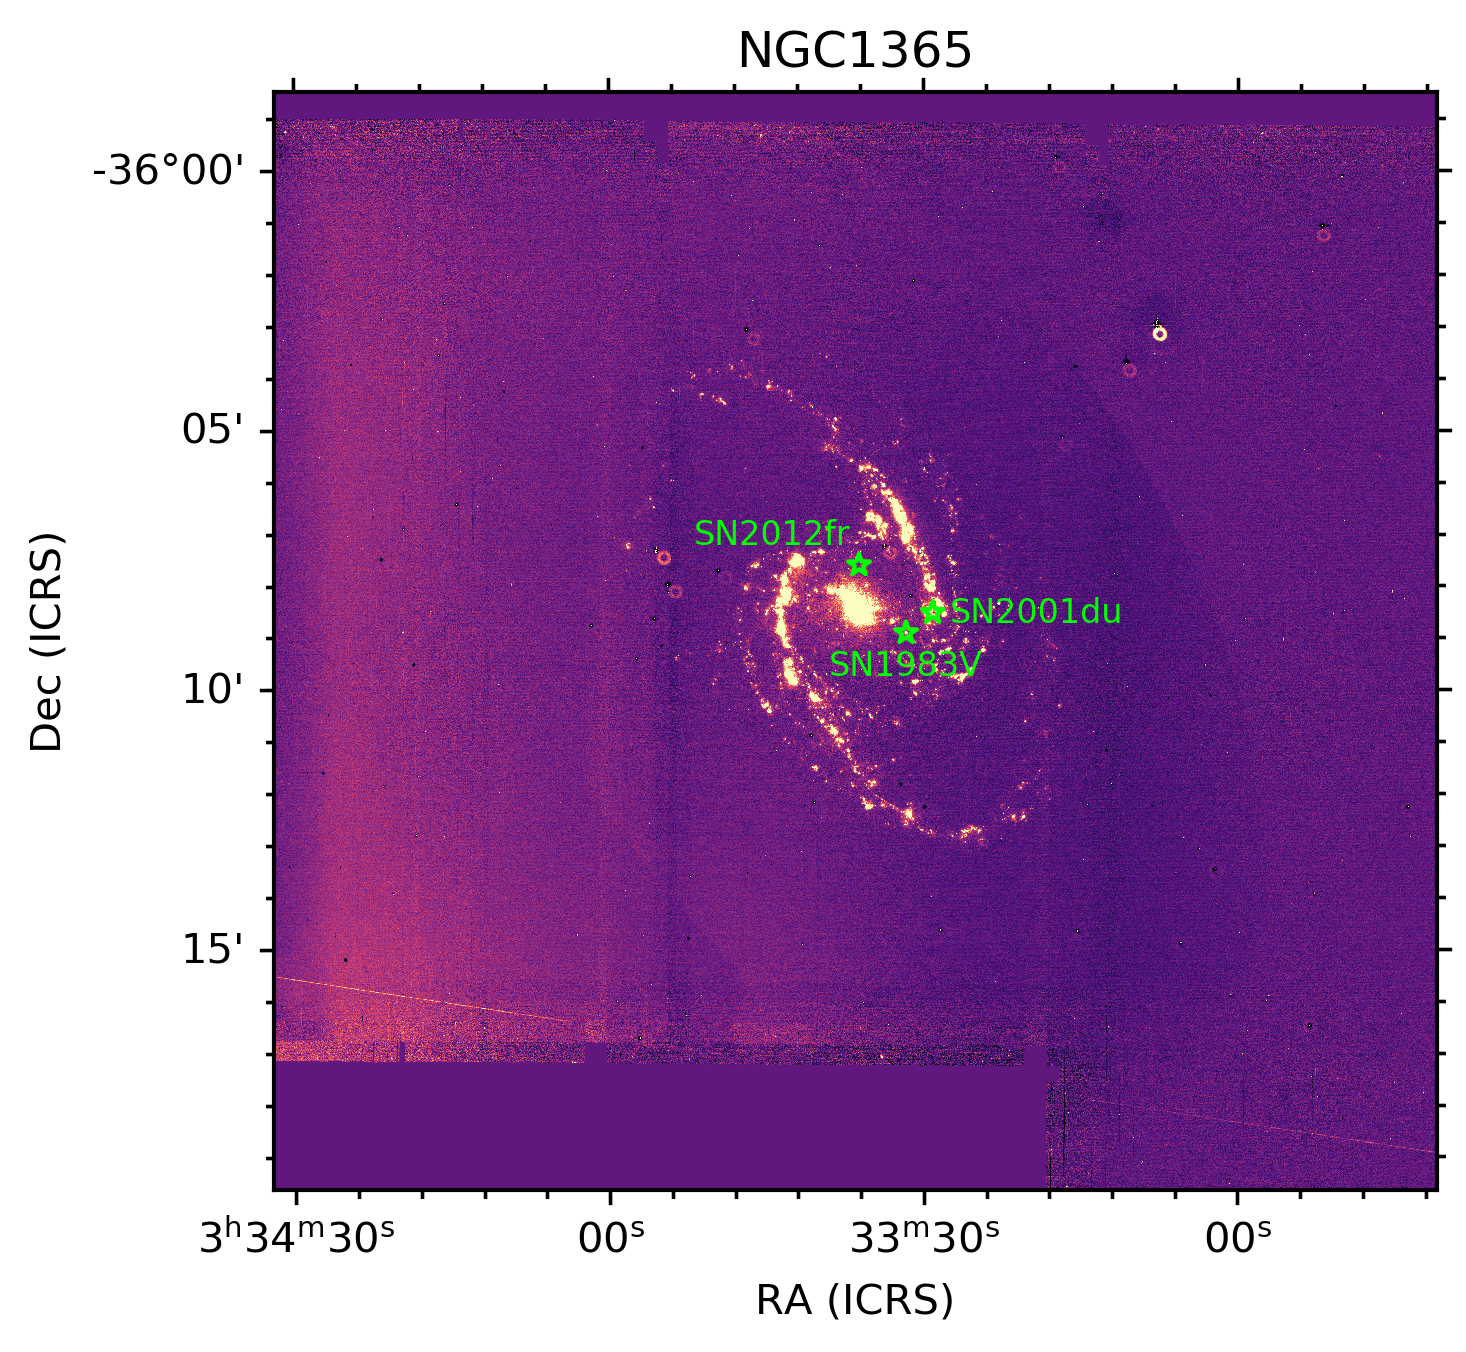

In [16]:
fig = aplpy.FITSFigure(fileName, figsize=(5,5), dpi=300)
fig.show_colorscale(cmap = 'magma')
fig.set_title('NGC1365')
fig.show_markers(NGC1365_data.ra, NGC1365_data.Dec, marker='*', edgecolor='lime')
fig.add_label(53.435, -36.117, text = 'SN2012fr', color = 'lime', weight = 'normal', size = '8')
fig.add_label(53.33, dec_list[1], text = 'SN2001du', color = 'lime', weight = 'normal', size = '8')
fig.add_label(ra_list[2], -36.159, text = 'SN1983V', color = 'lime', weight = 'normal', size = '8')
fig.savefig('NGC1365.jpg')

In [20]:
map = hdulist[0].data
hdr = hdulist[0].header

In [21]:
print(hdr)

SIMPLE  =                    T / Written by IDL:  Tue Jan 29 17:43:02 2019      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 5657 /                                                NAXIS2  =                 5340 /                                                EQUINOX =        2000.00000000 / Mean equinox                                   MJD-OBS =        57669.2586282 / Modified Julian date at start                  RADESYS = 'ICRS    '           / Astrometric system                             CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              CUNIT1  = 'deg     '           / Axis unit                                      CRVAL1  =        53.3109606283 / R.A. (degrees) of reference pixel              CRPIX1  =        3943.50000000 / Reference pixel on this axis                   CD1_1   =   -6.59809884383E-05 / Linear 

In [22]:
f_int  = map.flatten()

In [23]:
print(f_int)

[0. 0. 0. ... 0. 0. 0.]


In [24]:
print(f_int.shape)

(30208380,)


In [25]:
keep  = np.where(np.isfinite(f_int))
inten = f_int[keep]

In [26]:
print(inten.shape)

(30208297,)


In [27]:
from astropy.wcs import WCS
wcs      = WCS(hdulist[0].header, naxis=2)
naxis    = wcs._naxis # size of image naxis[0] = x and [1] = y
grid     = np.indices((naxis[1],naxis[0]))
ra, dec  = wcs.wcs_pix2world(grid[1],grid[0],0)

In [28]:
print(len(ra) * len(dec))

28515600


In [29]:
sorted_intensity = np.sort(inten)
print(len(sorted_intensity))

30208297


In [30]:
print(inten[7777777])

0.32848682171498866


In [31]:
print(sorted_intensity[0], sorted_intensity[-1], sorted_intensity[7777777])

-1911.0337142793812 14993.059573674815 -0.11763857175946786


In [32]:
final = sorted_intensity[sorted_intensity>=0.01]
print(len(final))

15976748


In [33]:
# x = ['']

In [34]:
import matplotlib.pyplot as plt
# plt.bar( )

In [35]:
num = len(final)
y = np.linspace(0.0, 1.0, num)

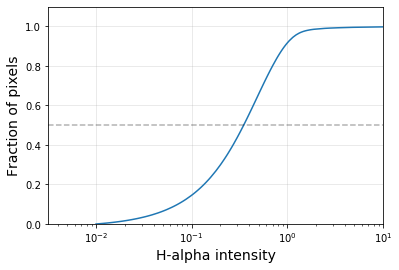

In [38]:
plt.semilogx(final, y)
plt.ylim(0.0, 1.1)
plt.xlim(10**(-2.5), 1e1)
plt.ylabel('Fraction of pixels', fontsize = 14)
plt.xlabel('H-alpha intensity', fontsize = 14)
plt.grid(True, alpha = 0.33)

plt.axhline(y=0.50, ls = '--', color = 'k', alpha = 0.3)
# axs[2].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetec3[-1]+100), ls = '--', color = 'k', alpha = 0.3)
# axs[2].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetec3[-1]+100), ls = '--', color = 'k', alpha = 0.3)


In [ ]:
# Function to create day of week histogram
# Change x array to log bins from 10^-3 to 10^3
def setupBar(final):

    ten_neg_3, ten_neg_2, ten_neg_1, ten_0, ten_1, ten_2, ten_3  = 0,0,0,0,0,0,0
    x = ["10^-3 to 10^-2", "10^-2 to 10^-1", "10^-1", "10^-1 to 10^0", "10^0 to 10^1", "10^1 to 10^2", "10^2 to 10^3"]
    x_pos = [i for i, _ in enumerate(x)]

    for i in range(len(final)):
        if (final[i] < 10**-2 and final[i] >= 10**-3):
            ten_neg_3 += 1
        elif (final[i] < 10**-1 and final[i] >= 10**-2):
            ten_neg_2 += 1
        elif (final[i] < 10**0 and final[i] >= 10**-1):
            ten_neg_1 += 1
        elif (final[i] < 10**1 and final[i] >= 10**0):
            ten_0 += 1
        elif (final[i] < 10**2 and final[i] >= 10**1):
            ten_1 += 1
        elif (final[i] < 10**3 and final[i] >= 10**2):
            ten_2 += 1
        else :
            ten_3 += 1
    
    bars = [ten_neg_3, ten_neg_2, ten_neg_1, ten_0, ten_1, ten_2, ten_3]

    return(x, x_pos, bars)

# This line calls the function and creates x and y for plot.
x, x_pos, bars = setupBar(final)

plt.bar(x, bars, width = 0.8)
plt.title("H-alpha intensity" )
plt.ylabel('Number of Pixels')
#plt.xlabel('')
plt.tick_params(axis='y', direction='in')
plt.tick_params(axis='x', which = 'both', bottom = None, top = None)
plt.grid(True, alpha = 0.33)



In [ ]:
def setupBar(final):

    ten_neg_2, ten_neg_1, ten_0, ten_1  = 0,0,0,0
    x = ["X < 0.1", "0.1 < X < 1", "1 < X < 10", "X > 10"]
    x_pos = [i for i, _ in enumerate(x)]

    for i in range(len(final)):
        if (final[i] < 10**-1):
            ten_neg_2 += 1
        elif (final[i] < 10**0 and final[i] >= 10**-1):
            ten_neg_1 += 1
        elif (final[i] < 10**1 and final[i] >= 10**0):
            ten_0 += 1
        else:
            ten_1 += 1
     
    
    bars = [ten_neg_2, ten_neg_1, ten_0, ten_1]

    return(x, x_pos, bars)

# This line calls the function and creates x and y for plot.
x, x_pos, bars = setupBar(final)

normbars=[]
for i in range (len(bars)):
    normbars.append(bars[i]/15976748)

plt.bar(x, normbars, width = 0.8)
plt.title("Histogram of H-alpha emission intensity" )
plt.ylabel('Fraction of Pixels')
plt.xlabel('H-alpha emission intensity')
plt.tick_params(axis='y', direction='in')
plt.tick_params(axis='x', which = 'both', bottom = None, top = None)
plt.grid(True, alpha = 0.33)
plt.ylim(0.0, 1.0)


In [ ]:
plt.semilogx(final, y)
plt.ylim(0.0, 1.1)
plt.xlim(10**(-2.5), 1e1)
plt.ylabel('Fraction of pixels', fontsize = 14)
plt.xlabel('H-alpha intensity', fontsize = 14)
plt.grid(True, alpha = 0.33)

plt.axhline(y=0.50, ls = '--', color = 'k', alpha = 0.3)

In [ ]:
def IsInMap(file, ra, dec):
    """
    Determines if an ra and dec is contained within the coverage of a map.    

    Parameters
    ----------
    file : string
        path name of map file
    ra   : float
        right ascension of target in decimal degrees
    dec  : float
        declination of target in decimal degrees
   
    Returns
    -------
    isInMap : bool
        boolean if target is in map
    xVal    : int
        x coordinate of target in map ("nan" = not in map)
    yVal    : int
        y coordinate of target in map ("nan" = not in map)
    """
    import numpy as np
    from astropy.wcs import WCS
    import astropy.io.fits as pyfits

    hdulist = pyfits.open(file)
    map = hdulist[0].data
    wcs = WCS(hdulist[0].header, naxis=2)
   
    pix_x, pix_y = wcs.wcs_world2pix(ra, dec, 0, ra_dec_order=True)

    naxis = wcs._naxis #size of image
    naxis1 = hdulist[0].header['NAXIS1']
    naxis2 = hdulist[0].header['NAXIS2']
    is_in_x = (pix_x >= 0) & (pix_x <= naxis[0]-1) #because of 0-indexing
    is_in_y = (pix_y >= 0) & (pix_y <= naxis[1]-1)
   
    x_coord = np.array(pix_x)[is_in_x & is_in_y]
    y_coord = np.array(pix_y)[is_in_x & is_in_y]
   
    isInMap = False
   
    if(is_in_x == True & is_in_y == True):
        isInMap = True
        xVal = int(round(float(x_coord)))
        yVal = int(round(float(y_coord)))
       
    else:
        xVal = float("nan")
        yVal = float("nan")
   
    return(isInMap, xVal, yVal)


def getValue(file, ra, dec):
    """
    Pulls map value at given ra & dec.

    Parameters
    ----------
    file : string
        path name of map file
    ra   : float
        right ascension of target in decimal degrees
    dec  : float
        declination of target in decimal degrees
   
    Returns
    -------
    value : float
        value at given location within map. (nan = not in map)
    """

    import astropy.io.fits as pyfits
   
    hdulist = pyfits.open(file)
    map = hdulist[0].data
   
    isInMap, xVal, yVal = IsInMap(file, ra, dec)
   
    if isInMap == True:
        value = map[yVal, xVal]      
    else:
        value = float("nan")
   
    return(value)

intensity_Array = []

for i in range(len(ra_list)):
    intVal = getValue(fileName, float(ra_list[i]), float(dec_list[i]))
    intensity_Array.append(intVal)
   
print(intensity_Array)

In [ ]:
supernova_cdf = [0.33, 0.66, 0.99]

plt.semilogx(final, y, label = 'H-alpha emission at all pixels')
plt.plot(intensity_Array, supernova_cdf, ls='',marker='*', ms = 20, label="H-alpha at SN location")
plt.ylim(0.0, 1.1)
plt.xlim(10**(-2.5), 1e2)
plt.ylabel('Fraction of pixels', fontsize = 14)
plt.xlabel('H-alpha intensity', fontsize = 14)
plt.grid(True, alpha = 0.33)
plt.legend(loc= 'best')
plt.text(10**-2.25, 0.6,"Less Star Formation")
plt.text(10, 0.8, "More Star Formation",rotation = 55)
plt.axhline(y=0.50, ls = '--', color = 'k', alpha = 0.3)

In [ ]:
print(type_list)

In [ ]:
bar1, bar2, bar3, bar4 = 0,1,1,1

norm_intensity = [bar1, bar2, bar3, bar4]

In [ ]:
plt.bar(x, normbars, width = 0.8)
plt.title("Histogram of H-alpha emission intensity" )
plt.ylabel('Fraction of Pixels')
plt.xlabel('H-alpha emission intensity')
plt.tick_params(axis='y', direction='in')
plt.tick_params(axis='x', which = 'both', bottom = None, top = None)
plt.grid(True, alpha = 0.33)
plt.ylim(0.0, 1.0)
plt.bar(norm_intensity, normbars, color= 'orange')

In [ ]:
print(intensity_Array)

In [ ]:
bar1, bar2, bar3, bar4 = 0,1,1,1

norm_intensity = [bar1, bar2, bar3, bar4]